C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_8160\4214325992.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.

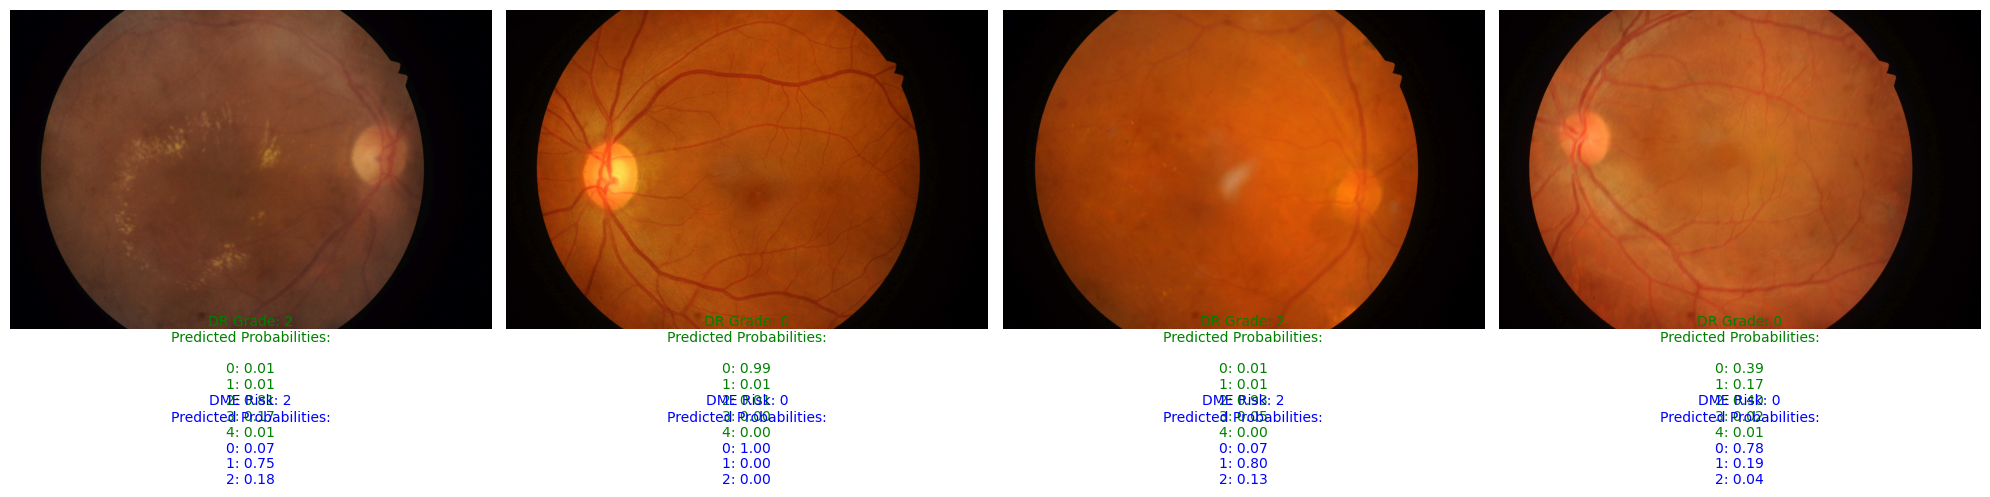

In [1]:
import torch
import random
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from PIL import Image
import numpy as np
from main3 import CANet
import matplotlib.patches as patches

# Load your trained model (CANet)
model = CANet()  # Replace with the actual class name if different
model.load_state_dict(torch.load(r"C:\Users\KIIT\Desktop\sample\IDRiD\model.pth"))
model.eval()

# Load the dataset (CSV) and image paths
df = pd.read_csv(r"C:\Users\KIIT\Desktop\sample\IDRiD\IDRiD_Disease Grading_Testing Labels.csv")
image_dir = r"C:\Users\KIIT\Desktop\sample\IDRiD\test"

# Define image transformations (resize and normalization)
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Randomly select 4 images from the test dataset
random_images = df.sample(4)

# Initialize plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for plot_idx, (idx, row) in enumerate(random_images.iterrows()):
    image_name = row['Image name']
    true_dr = row['Retinopathy grade']
    true_dme = row['Risk of macular edema ']
    
    # Load and transform the image
    img_path = f"{image_dir}/{image_name}.jpg"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image {img_path} not found. Skipping.")
        continue
    
    input_tensor = transform(img).unsqueeze(0)
    
    # Get model predictions
    with torch.no_grad():
        dr_probs, dme_probs = model(input_tensor)
        dr_probs = torch.softmax(dr_probs, dim=1).numpy().flatten()
        dme_probs = torch.softmax(dme_probs, dim=1).numpy().flatten()
    
    # Plot the image
    axes[plot_idx].imshow(np.asarray(img))
    axes[plot_idx].axis('off')
    
    # Format true labels and predicted probabilities
    dr_label = f"DR Grade: {true_dr}\nPredicted Probabilities:"
    dme_label = f"DME Risk: {true_dme}\nPredicted Probabilities:"

    # Define bounding box positions
    dr_bbox_height = 0.2  # Height for DR bounding box
    dme_bbox_height = 0.3  # Height for DME bounding box
    dr_text_y_start = -0.05  # Starting position for DR text
    dme_text_y_start = -0.3  # Starting position for DME text

    # Create bounding box for DR probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, dr_text_y_start), 0.8, dr_bbox_height, 
                                                edgecolor='green', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, dr_text_y_start + 0.05, dr_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='green')
    
    # Add DR probabilities to the plot
    for i, p in enumerate(dr_probs):
        axes[plot_idx].text(0.5, dr_text_y_start - 0.05 * (i + 1), f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color='green')

    # Create bounding box for DME probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, dme_text_y_start), 0.8, dme_bbox_height, 
                                                edgecolor='blue', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, dme_text_y_start + 0.05, dme_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='blue')
    
    # Add DME probabilities to the plot
    for i, p in enumerate(dme_probs):
        axes[plot_idx].text(0.5, dme_text_y_start - 0.05 * (i + 1), f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color='blue')

# Adjust layout to give more space for the text
plt.tight_layout()
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_8160\1127430916.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.

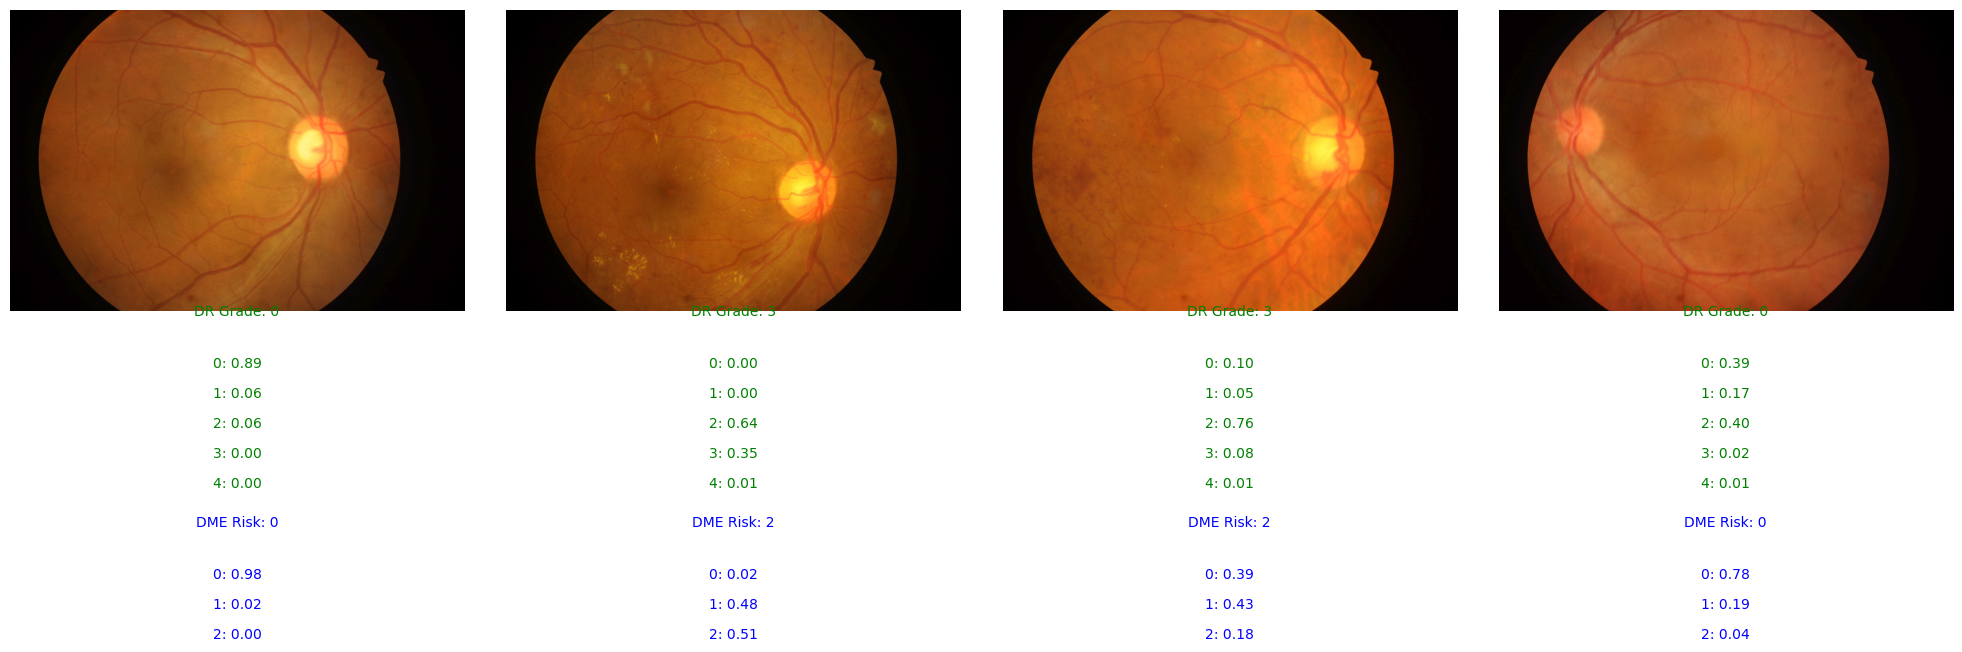

In [7]:
import torch
import random
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from PIL import Image
import numpy as np
from main3 import CANet
import matplotlib.patches as patches

# Load your trained model (CANet)
model = CANet()  # Replace with the actual class name if different
model.load_state_dict(torch.load(r"C:\Users\KIIT\Desktop\sample\IDRiD\model.pth"))
model.eval()

# Load the dataset (CSV) and image paths
df = pd.read_csv(r"C:\Users\KIIT\Desktop\sample\IDRiD\IDRiD_Disease Grading_Testing Labels.csv")
image_dir = r"C:\Users\KIIT\Desktop\sample\IDRiD\test"

# Define image transformations (resize and normalization)
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Randomly select 4 images from the test dataset
random_images = df.sample(4)

# Initialize plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for plot_idx, (idx, row) in enumerate(random_images.iterrows()):
    image_name = row['Image name']
    true_dr = row['Retinopathy grade']
    true_dme = row['Risk of macular edema ']
    
    # Load and transform the image
    img_path = f"{image_dir}/{image_name}.jpg"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image {img_path} not found. Skipping.")
        continue
    
    input_tensor = transform(img).unsqueeze(0)
    
    # Get model predictions
    with torch.no_grad():
        dr_probs, dme_probs = model(input_tensor)
        dr_probs = torch.softmax(dr_probs, dim=1).numpy().flatten()
        dme_probs = torch.softmax(dme_probs, dim=1).numpy().flatten()
    
    # Plot the image
    axes[plot_idx].imshow(np.asarray(img))
    axes[plot_idx].axis('off')
    
    # Format true labels and predicted probabilities
    dr_label = f"DR Grade: {true_dr}"
    dme_label = f"DME Risk: {true_dme}"

    # Set vertical spacing for text
    dr_spacing = 0.1
    dme_spacing = 0.1

    # Calculate bounding box height based on number of probabilities
    dr_bbox_height = 0.2 + len(dr_probs) * dr_spacing
    dme_bbox_height = 0.2 + len(dme_probs) * dme_spacing

    # Create bounding box for DR probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.05), 0.8, dr_bbox_height, 
                                                edgecolor='green', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, 0, dr_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='green')

    # Add DR probabilities to the plot
    for i, p in enumerate(dr_probs):
        axes[plot_idx].text(0.5, -0.05 - (i + 1) * dr_spacing, f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color='green')

    # Create bounding box for DME probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.05 - dr_bbox_height), 0.8, dme_bbox_height, 
                                                edgecolor='blue', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, -0.05 - dr_bbox_height + 0.05, dme_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='blue')

    # Add DME probabilities to the plot
    for i, p in enumerate(dme_probs):
        axes[plot_idx].text(0.5, -0.05 - dr_bbox_height - (i + 1) * dme_spacing, f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color='blue')

# Adjust layout to give more space for the text
plt.tight_layout()
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_8160\904478036.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.m

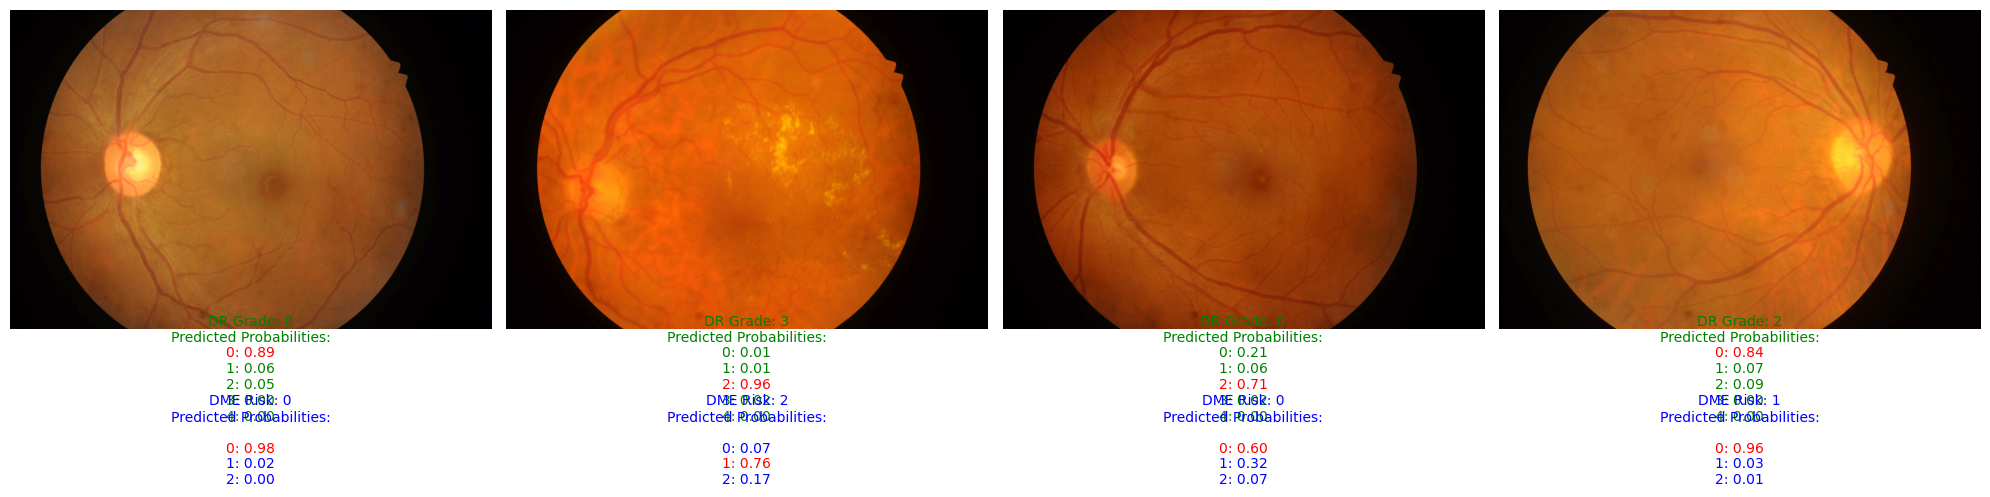

In [5]:
import torch
import random
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from PIL import Image
import numpy as np
from main3 import CANet
import matplotlib.patches as patches

# Load your trained model (CANet)
model = CANet()  # Replace with the actual class name if different
model.load_state_dict(torch.load(r"C:\Users\KIIT\Desktop\sample\IDRiD\model.pth"))
model.eval()

# Load the dataset (CSV) and image paths
df = pd.read_csv(r"C:\Users\KIIT\Desktop\sample\IDRiD\IDRiD_Disease Grading_Testing Labels.csv")
image_dir = r"C:\Users\KIIT\Desktop\sample\IDRiD\test"

# Define image transformations (resize and normalization)
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Randomly select 4 images from the test dataset
random_images = df.sample(4)

# Initialize plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for plot_idx, (idx, row) in enumerate(random_images.iterrows()):
    image_name = row['Image name']
    true_dr = row['Retinopathy grade']
    true_dme = row['Risk of macular edema ']
    
    # Load and transform the image
    img_path = f"{image_dir}/{image_name}.jpg"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image {img_path} not found. Skipping.")
        continue
    
    input_tensor = transform(img).unsqueeze(0)
    
    # Get model predictions
    with torch.no_grad():
        dr_probs, dme_probs = model(input_tensor)
        dr_probs = torch.softmax(dr_probs, dim=1).numpy().flatten()
        dme_probs = torch.softmax(dme_probs, dim=1).numpy().flatten()
    
    # Plot the image
    axes[plot_idx].imshow(np.asarray(img))
    axes[plot_idx].axis('off')
    
    # Format true labels and predicted probabilities
    dr_label = f"DR Grade: {true_dr}\nPredicted Probabilities:"
    dme_label = f"DME Risk: {true_dme}\nPredicted Probabilities:"

    # Create bounding box for DR probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.05), 0.8, 0.2, 
                                                edgecolor='green', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, 0, dr_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='green')

    # Highlight the highest probability for DR
    max_dr_idx = np.argmax(dr_probs)
    for i, p in enumerate(dr_probs):
        color = 'red' if i == max_dr_idx else 'green'
        axes[plot_idx].text(0.5, -0.05 - i * 0.05, f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color=color)

    # Create bounding box for DME probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.3), 0.8, 0.2, 
                                                edgecolor='blue', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, -0.3 + 0.05, dme_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='blue')

    # Highlight the highest probability for DME
    max_dme_idx = np.argmax(dme_probs)
    for i, p in enumerate(dme_probs):
        color = 'red' if i == max_dme_idx else 'blue'
        axes[plot_idx].text(0.5, -0.3 - (i + 1) * 0.05, f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color=color)

# Adjust layout to give more space for the text
plt.tight_layout()
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_8160\243816620.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.m

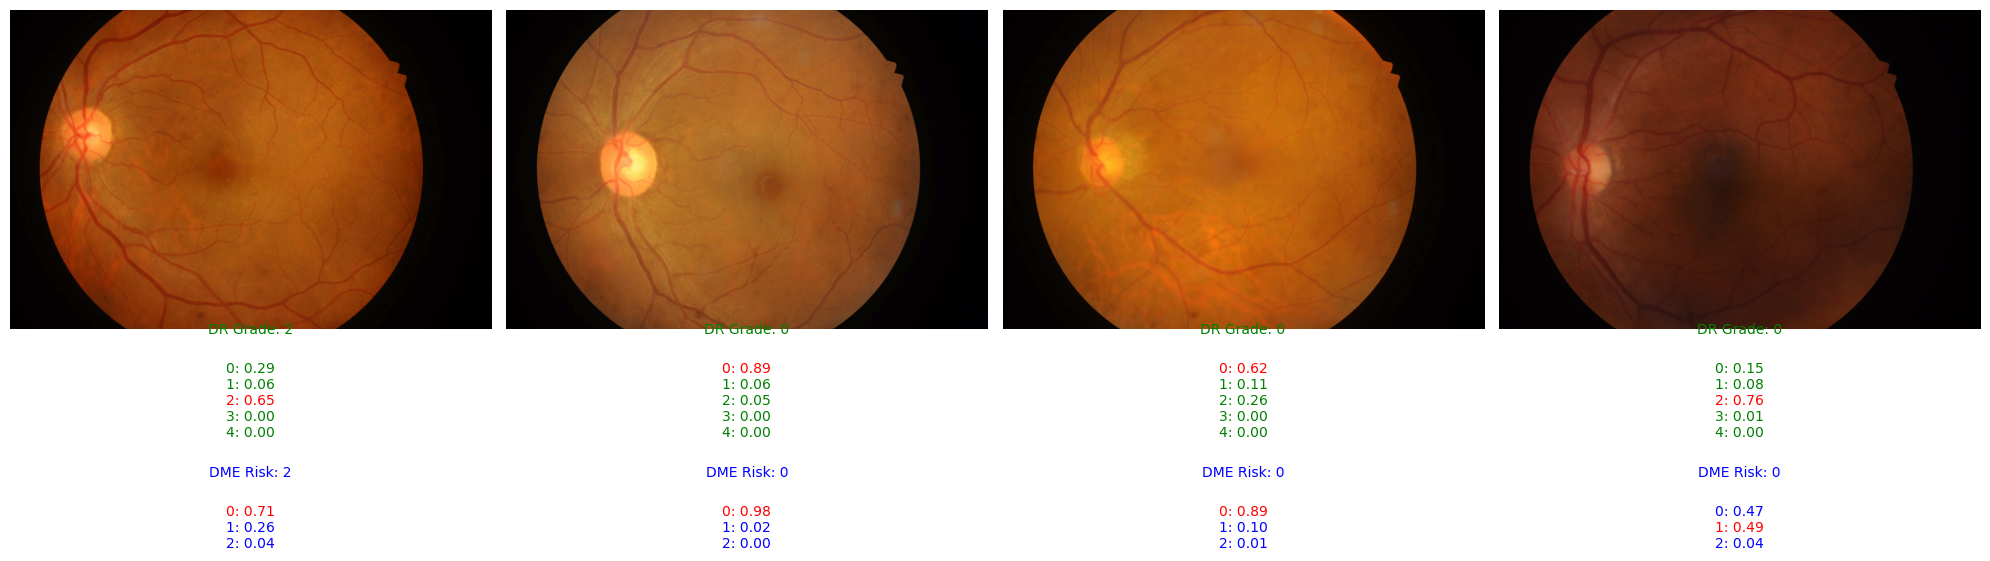

In [15]:
import torch
import random
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from PIL import Image
import numpy as np
from main3 import CANet
import matplotlib.patches as patches

# Load your trained model (CANet)
model = CANet()  # Replace with the actual class name if different
model.load_state_dict(torch.load(r"C:\Users\KIIT\Desktop\sample\IDRiD\model.pth"))
model.eval()

# Load the dataset (CSV) and image paths
df = pd.read_csv(r"C:\Users\KIIT\Desktop\sample\IDRiD\IDRiD_Disease Grading_Testing Labels.csv")
image_dir = r"C:\Users\KIIT\Desktop\sample\IDRiD\test"

# Define image transformations (resize and normalization)
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Randomly select 4 images from the test dataset
random_images = df.sample(4)

# Initialize plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for plot_idx, (idx, row) in enumerate(random_images.iterrows()):
    image_name = row['Image name']
    true_dr = row['Retinopathy grade']
    true_dme = row['Risk of macular edema ']
    
    # Load and transform the image
    img_path = f"{image_dir}/{image_name}.jpg"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image {img_path} not found. Skipping.")
        continue
    
    input_tensor = transform(img).unsqueeze(0)
    
    # Get model predictions
    with torch.no_grad():
        dr_probs, dme_probs = model(input_tensor)
        dr_probs = torch.softmax(dr_probs, dim=1).numpy().flatten()
        dme_probs = torch.softmax(dme_probs, dim=1).numpy().flatten()
    
    # Plot the image
    axes[plot_idx].imshow(np.asarray(img))
    axes[plot_idx].axis('off')
    
    # Format true labels and predicted probabilities
    dr_label = f"DR Grade: {true_dr}"
    dme_label = f"DME Risk: {true_dme}"

    # Set vertical spacing for text
    dr_spacing = 0.05
    dme_spacing = 0.05

    # Calculate bounding box height based on number of probabilities
    dr_bbox_height = 0.2 + len(dr_probs) * dr_spacing
    dme_bbox_height = 0.2 + len(dme_probs) * dme_spacing

    # Create bounding box for DR probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.05), 0.8, dr_bbox_height, 
                                                edgecolor='green', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, 0, dr_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='green')

    # Find the index of the maximum probability for DR
    max_dr_idx = np.argmax(dr_probs)

    # Add DR probabilities to the plot
    for i, p in enumerate(dr_probs):
        color = 'red' if i == max_dr_idx else 'green'  # Highlight max probability
        axes[plot_idx].text(0.5, -0.05 - (i + 1) * dr_spacing, f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color=color)

    # Create bounding box for DME probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.05 - dr_bbox_height), 0.8, dme_bbox_height, 
                                                edgecolor='blue', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, -0.05 - dr_bbox_height + 0.05, dme_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='blue')

    # Find the index of the maximum probability for DME
    max_dme_idx = np.argmax(dme_probs)

    # Add DME probabilities to the plot
    for i, p in enumerate(dme_probs):
        color = 'red' if i == max_dme_idx else 'blue'  # Highlight max probability
        axes[plot_idx].text(0.5, -0.05 - dr_bbox_height - (i + 1) * dme_spacing, f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color=color)

# Adjust layout to give more space for the text
plt.tight_layout()
plt.show()


In [25]:
import torch
import random
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from PIL import Image
import numpy as np
from main3 import CANet
import matplotlib.patches as patches

# Load your trained model (CANet)
model = CANet()  # Replace with the actual class name if different
model.load_state_dict(torch.load(r"C:\Users\KIIT\Desktop\sample\IDRiD\model.pth"))
model.eval()

# Load the dataset (CSV) and image paths
df = pd.read_csv(r"C:\Users\KIIT\Desktop\sample\IDRiD\IDRiD_Disease Grading_Testing Labels.csv")
image_dir = r"C:\Users\KIIT\Desktop\sample\IDRiD\test"

# Define image transformations (resize and normalization)
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Randomly select 4 images from the test dataset
random_images = df.sample(4)

# Initialize plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for plot_idx, (idx, row) in enumerate(random_images.iterrows()):
    image_name = row['Image name']
    true_dr = row['Retinopathy grade']
    true_dme = row['Risk of macular edema ']
    
    # Load and transform the image
    img_path = f"{image_dir}/{image_name}.jpg"
    
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print(f"Image {img_path} not found. Skipping.")
        continue
    
    input_tensor = transform(img).unsqueeze(0)
    
    # Get model predictions
    with torch.no_grad():
        dr_probs, dme_probs = model(input_tensor)
        dr_probs = torch.softmax(dr_probs, dim=1).numpy().flatten()
        dme_probs = torch.softmax(dme_probs, dim=1).numpy().flatten()
    
    # Plot the image
    axes[plot_idx].imshow(np.asarray(img))
    axes[plot_idx].axis('off')
    
    # Format true labels and predicted probabilities
    dr_label = f"DR Grade: {true_dr}"
    dme_label = f"DME Risk: {true_dme}"

    # Set vertical spacing for text
    dr_spacing = 0.05  # Adjusted spacing
    dme_spacing = 0.1   # Keep DME spacing as is

    # Calculate bounding box height based on number of probabilities
    dr_bbox_height = 0.2 + len(dr_probs) * dr_spacing
    dme_bbox_height = 0.2 + len(dme_probs) * dme_spacing

    # Create bounding box for DR probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.05), 0.8, dr_bbox_height, 
                                                edgecolor='green', facecolor='none', lw=1.5))
    
    # Adjust the vertical position of the "DR Grade" label
    axes[plot_idx].text(0.5, 0.05, dr_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='green')

    # Find the index of the maximum probability for DR
    max_dr_idx = np.argmax(dr_probs)

    # Adjust the first probability's position
    first_probability_y = -0.05 - (1 * dr_spacing)  # Adjust the base position for probabilities

    # Add DR probabilities to the plot
    for i, p in enumerate(dr_probs):
        color = 'red' if i == max_dr_idx else 'green'  # Highlight max probability
        axes[plot_idx].text(0.5, first_probability_y - (i * dr_spacing), f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color=color)

    # Create bounding box for DME probabilities
    axes[plot_idx].add_patch(patches.Rectangle((0.1, -0.05 - dr_bbox_height), 0.8, dme_bbox_height, 
                                                edgecolor='blue', facecolor='none', lw=1.5))
    axes[plot_idx].text(0.5, -0.05 - dr_bbox_height + 0.05, dme_label, ha='center', va='center', 
                        transform=axes[plot_idx].transAxes, fontsize=10, color='blue')

    # Find the index of the maximum probability for DME
    max_dme_idx = np.argmax(dme_probs)

    # Add DME probabilities to the plot
    for i, p in enumerate(dme_probs):
        color = 'red' if i == max_dme_idx else 'blue'  # Highlight max probability
        axes[plot_idx].text(0.5, -0.05 - dr_bbox_height - (i + 1) * dme_spacing, f"{i}: {p:.2f}", 
                            ha='center', va='top', transform=axes[plot_idx].transAxes, fontsize=10, color=color)

# Adjust layout to give more space for the text
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (1826519352.py, line 52)